In [1]:
# import necessary lib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

## import data into DataFrame

In [2]:
df1 = pd.read_csv("WA_housing_for_predicting_cleaned.csv")
df1.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold,age_of_house
0,0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,WA,98133,2014-05-02,66
1,1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,WA,98119,2014-05-02,100
2,2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,WA,98042,2014-05-02,55
3,3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,WA,98008,2014-05-02,58
4,4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,WA,98052,2014-05-02,45


In [3]:
df1.shape

(4546, 20)

In [4]:
df1.columns

Index(['Unnamed: 0', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'state',
       'zip', 'year_sold', 'age_of_house'],
      dtype='object')

In [5]:
df2 = df1.drop(columns=['Unnamed: 0'])

In [6]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold,age_of_house
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,WA,98133,2014-05-02,66
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,WA,98119,2014-05-02,100
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,WA,98042,2014-05-02,55
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,WA,98008,2014-05-02,58
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,WA,98052,2014-05-02,45


## Create new DataFrame with necessary columns (features) to create our model

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
X_city_encoder = LabelEncoder()

In [9]:
X_city_encoder.fit(df2["city"])

LabelEncoder()

In [10]:
X_city_encoder = X_city_encoder.transform(df2["city"])

In [11]:
X_city_encoder

array([36, 35, 18, ..., 32, 35,  9])

In [12]:
len(X_city_encoder)

4546

In [13]:
df2.insert(6, "city_encoder", X_city_encoder, True)

In [14]:
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,city_encoder,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold,age_of_house
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,36,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,WA,98133,2014-05-02,66
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,35,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,WA,98119,2014-05-02,100
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,18,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,WA,98042,2014-05-02,55
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,3,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,WA,98008,2014-05-02,58
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,31,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,WA,98052,2014-05-02,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,35,1.0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,WA,98133,2014-07-09,67
4542,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,3,2.0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,WA,98007,2014-07-09,38
4543,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,32,2.0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,WA,98059,2014-07-09,12
4544,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,35,1.0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,WA,98178,2014-07-10,47


In [15]:
y =df2["price"].values.reshape(-1, 1)


In [16]:
X  =df2[["bedrooms","bathrooms","sqft_living","condition","age_of_house","city_encoder"]]

In [17]:
# Split our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [19]:
from sklearn.linear_model import Ridge
linear_ridge_model= Ridge()
linear_ridge_model.fit(X_train_scaled, y_train_scaled)

Ridge()

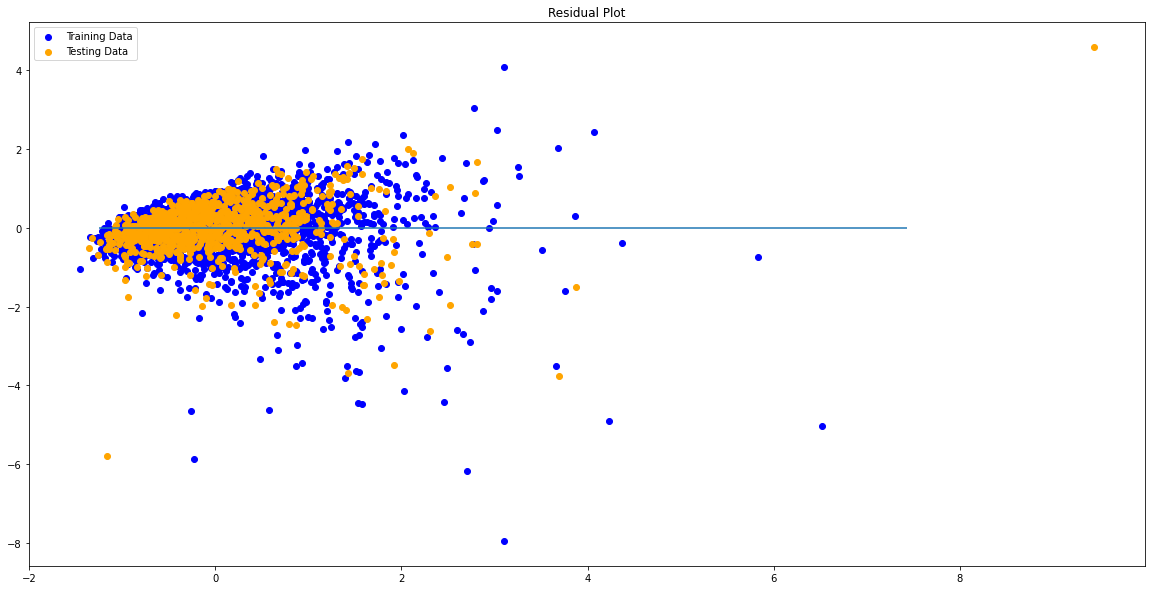

In [20]:
plt.scatter(linear_ridge_model.predict(X_train_scaled), linear_ridge_model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(linear_ridge_model.predict(X_test_scaled), linear_ridge_model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

predictions = linear_ridge_model.predict(X_test_scaled)

In [22]:
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = linear_ridge_model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.46110792950697665, R2: 0.5165734526960296


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(Ridge(), X_test_scaled, y_test_scaled, cv=cv)

array([0.53217601, 0.54932989, 0.57996551, 0.50811145, 0.47482923])

In [24]:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def find_best_model_using_gridsearchcv(X_test_scaled,y_test_scaled):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.568904,{'normalize': True}
1,lasso,0.568904,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.333564,"{'criterion': 'mse', 'splitter': 'best'}"
